<a href="https://colab.research.google.com/github/marcellinus-witarsah/predictive-analytics-diamonds-dataset/blob/main/predictive_analytics_diamonds_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Loading

In [3]:
# load the dataset from GitHub
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds_ori = diamonds.copy()
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Exploratory Data Analysis (EDA)

## Variable Description
1. **price**: price in US dollars (\$326--\$18,823)
2. **carat**: weight of the diamond (0.2--5.01)
3. **cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. **color**: diamond colour, from J (worst) to D (best)
5. **clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. **x**: length in mm (0--10.74)
7. **y**: width in mm (0--58.9)
8. **z**: depth in mm (0--31.8)
9. **depth**: total depth percentage = z / mean(x, y) = ***2 * z / (x + y)*** (43--79)
10. **table**: width of top of diamond relative to widest point ***(43--95)***

In [4]:
# display information about columns, missing/ null data, and data type  
display(diamonds_ori.info())
display(diamonds_ori.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


None

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Missing Values

There are some missing values which can be indicated by 0 value of **x**, **y**, and **z**.

In [5]:
missing_x = diamonds_ori['x'] == 0
missing_y = diamonds_ori['y'] == 0
missing_z = diamonds_ori['z'] == 0
print("Missing value of x = ", missing_x.sum())
print("Missing value of y = ", missing_y.sum())
print("Missing value of z = ", missing_z.sum())

Missing value of x =  8
Missing value of y =  7
Missing value of z =  20


Find location of the missing values

In [6]:
# location of missing value x
display(diamonds_ori.loc[missing_x])

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [7]:
# location of missing value y
display(diamonds_ori.loc[missing_y])

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [8]:
# location of missing value z
display(diamonds_ori.loc[missing_z])

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
# rows that have x, y, and z value missing
diamonds_ori.loc[missing_x & missing_y & missing_z]

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


Because the amount of missing values in x, y, and z is small compare to other **53.920**, dropping the data will not be a big deal.

In [10]:
diamonds = diamonds_ori[(missing_x | missing_y | missing_z)!=1]
diamonds.shape

(53920, 10)

In [11]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Outliers
Outliers are samples that ​​are very far from the general scope of the main data.
1. Hypothesis Testing
2. Z-score (will be demonstrated)
3. IQR (will be demonstrated)

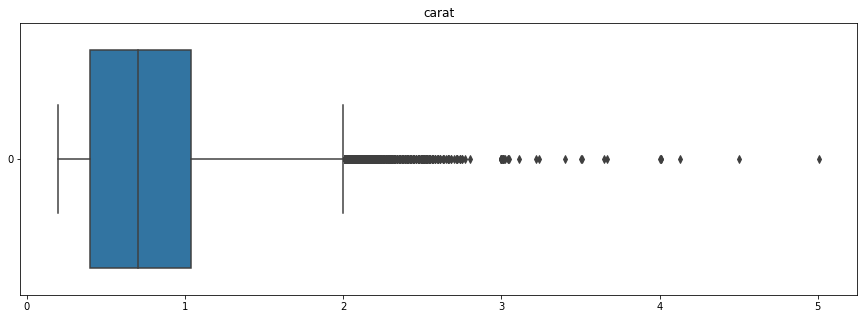

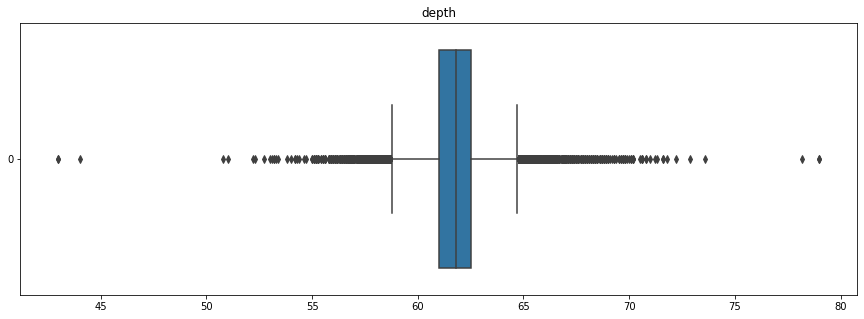

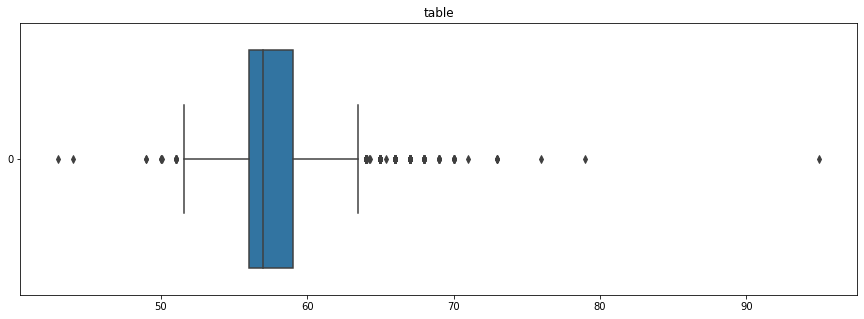

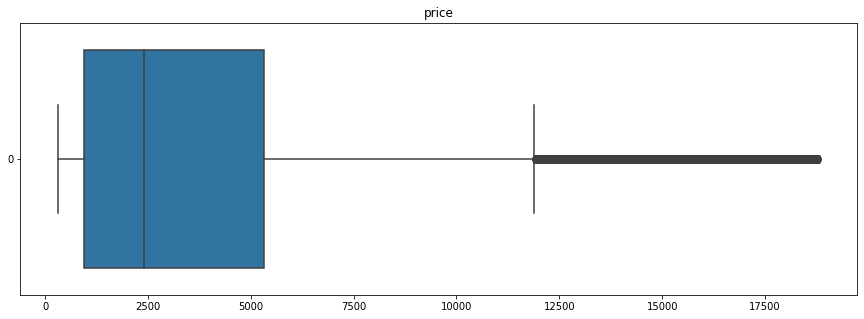

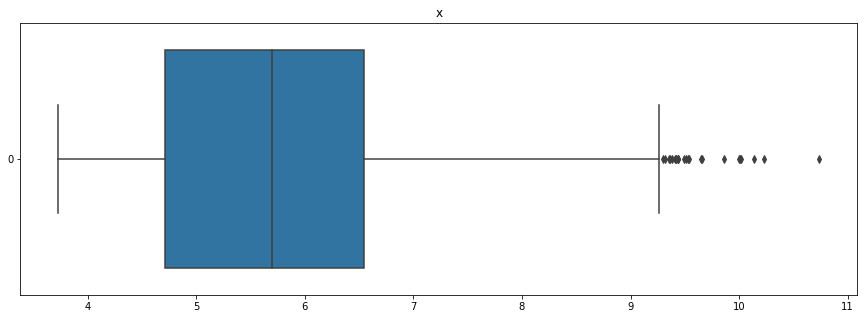

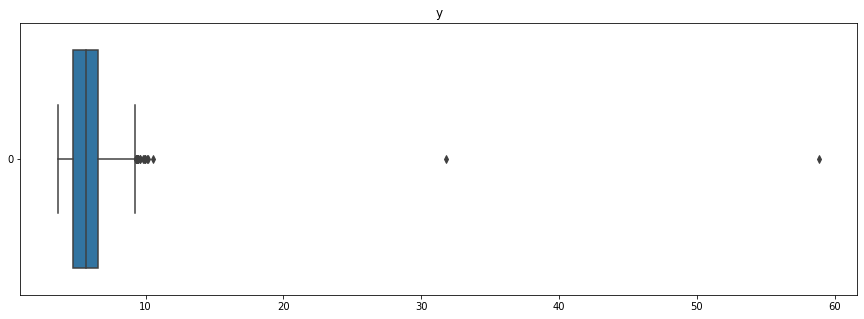

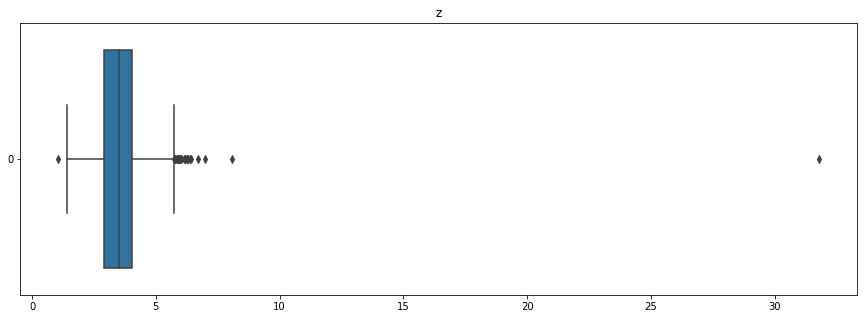

In [12]:
# check outlier in data using boxplot
numerical_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']
for col in numerical_features:
  plt.figure(figsize=(15, 5))
  sns.boxplot(data=diamonds[col], orient='h').set(title=col)
  plt.show()

There are so many outliers especially in carat, depth, and price columns. We will remove the outlier for this project.

### Remove Outliers Using IQR Method
Data that are considered outliers are the data that is below **1.5 * IQR** Q1 (25th percentile) or above **1.5 * IQR** from Q3 (75th percentile) value.

$$
IQR = Q3 = Q1
$$

In [14]:
q1 = diamonds.quantile(0.25)
q3 = diamonds.quantile(0.75)
iqr = q3-q1
diamonds = diamonds.loc[~((diamonds<(q1-1.5*iqr))|(diamonds>(q3+1.5*iqr))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


In [15]:
diamonds.shape

(47524, 10)

### Remove Outliers using Z-score

Later

## Univariate Analysis

In [43]:
numerical_features = diamonds.select_dtypes(include=['float64', 'int64']).columns.to_list()
categorical_features = diamonds.select_dtypes(include='object').columns.to_list()

### Categorical Columns

In [44]:
def univariate_categorical(feature):
  count = diamonds[feature].value_counts()
  percent = 100*diamonds[feature].value_counts(normalize=True)
  print(pd.DataFrame({'count': count, 'percent': percent}))
  count.plot(kind='bar').set(title=feature)
  plt.show()

           count    percent
Ideal      20340  42.799428
Premium    12115  25.492383
Very Good  10994  23.133575
Good        3745   7.880229
Fair         330   0.694386


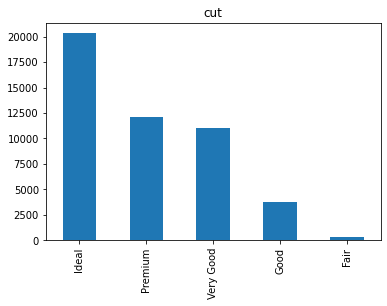

   count    percent
G  10081  21.212440
E   8910  18.748422
F   8466  17.814157
H   7176  15.099739
D   6195  13.035519
I   4462   9.388940
J   2234   4.700783


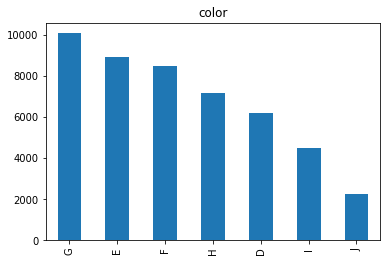

      count    percent
SI1   11552  24.307718
VS2   10928  22.994697
SI2    7402  15.575288
VS1    7373  15.514266
VVS2   4683   9.853969
VVS1   3463   7.286845
IF     1650   3.471930
I1      473   0.995287


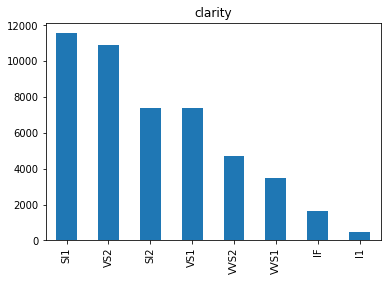

In [45]:
for categorical_feature in categorical_features:
  univariate_categorical(categorical_feature)

### Numerical Columns

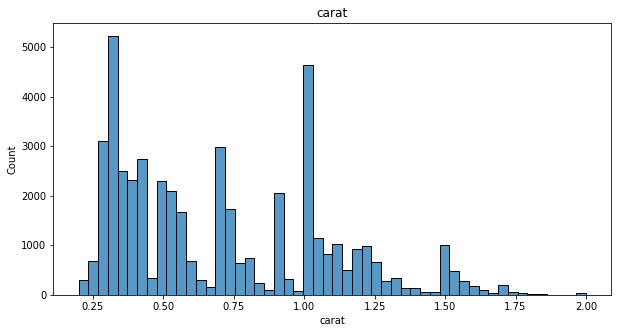

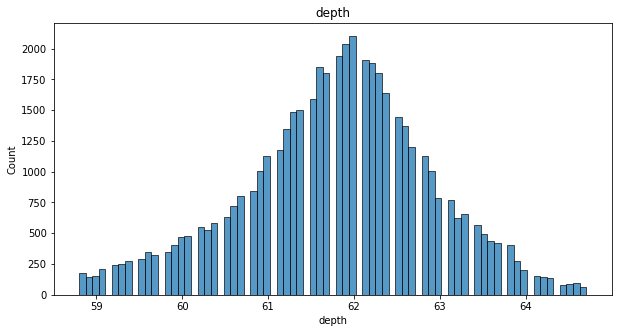

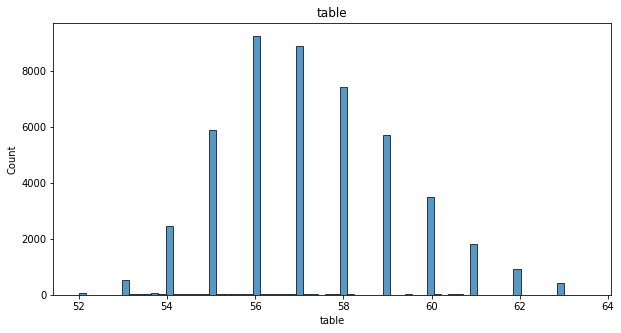

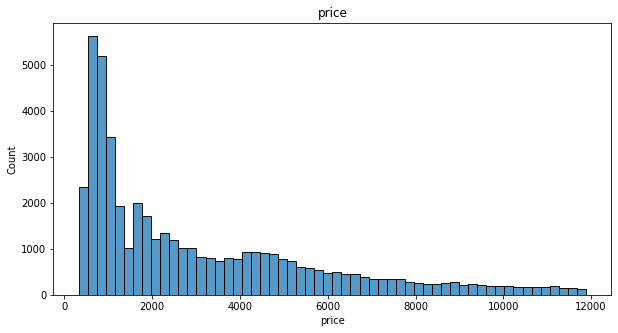

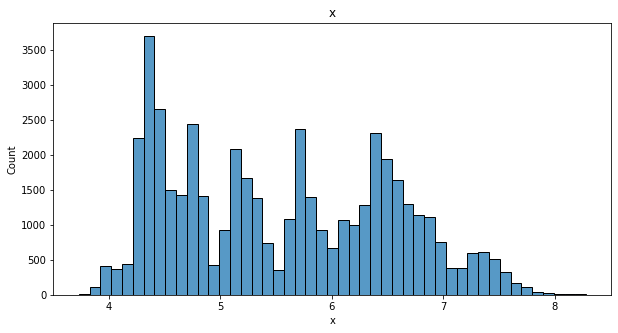

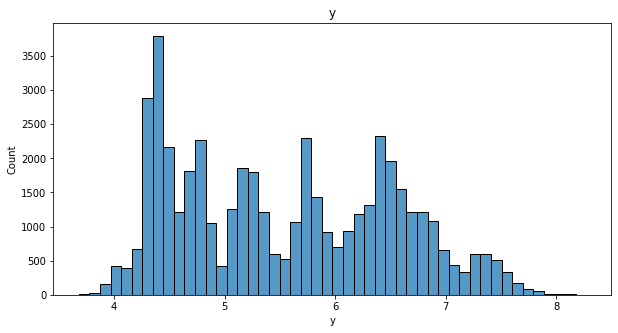

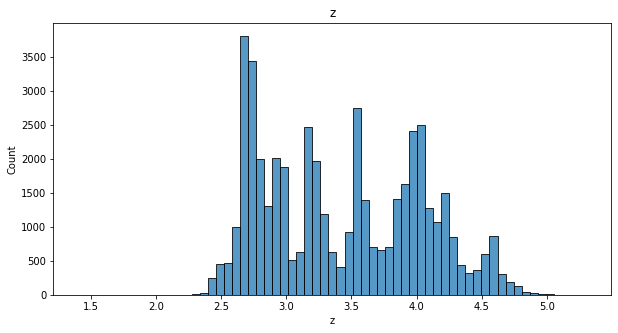

In [46]:
for numerical_feature in numerical_features:
  plt.figure(figsize=(10, 5))
  sns.histplot(data=diamonds, x=numerical_feature).set(title=numerical_feature)
  plt.show()

Information about price column :
1. The distribution is right skewed
2. The increase in diamond prices is proportional to the decrease in the number of diamond samples.
3. The highest price is around 11.800 - 11.900 dollars.
3. The lowest price is around 500 - 1.000 dollars.

Other columns like **x**, **y**, **z** have similar distribution.

**Depth** columns are almost look like a bell curve (normal distribution). 

There's no much to tell about **carat** and **dept** column.

## Multivariate Analysis

In [47]:
numerical_features = diamonds.select_dtypes(include=['float64', 'int64']).columns.to_list()
categorical_features = diamonds.select_dtypes(include='object').columns.to_list()

### Categorical Features
Plot how categorical features impact the price of the diamond

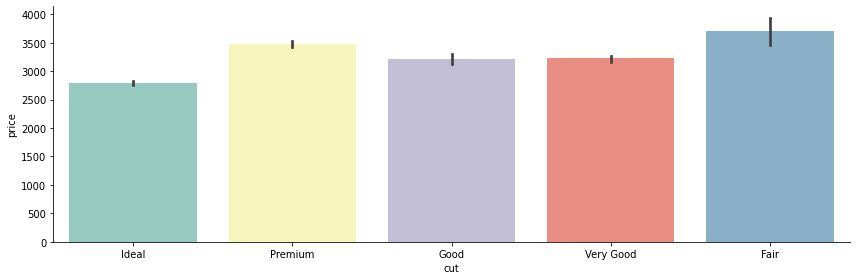

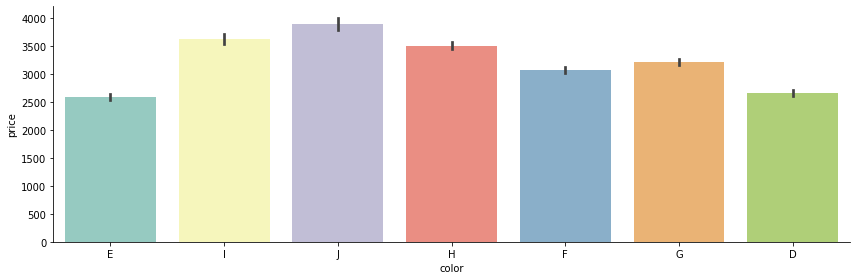

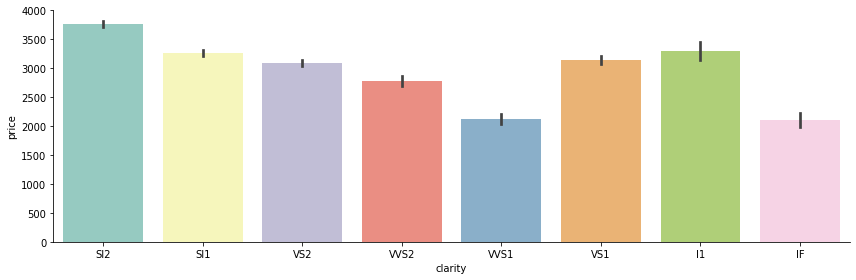

In [59]:
for categorical_feature in categorical_features:
  sns.catplot(x=categorical_feature, y='price', data=diamonds, kind='bar', 
              height=4, aspect=3,dodge=False,  palette="Set3")
  plt.show()

### Numerical Features

Plot how numerica features impact the price of the diamond